In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
raw_data = sns.load_dataset('titanic')
raw_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
raw_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
clean_data = raw_data.dropna(axis=1, thresh=500)

In [6]:
clean_data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [7]:
mean_age = clean_data['age'].mean()
print(mean_age)

29.69911764705882


In [8]:
clean_data['age'].fillna(mean_age, inplace=True)
clean_data.head(10)

C:\Users\scolp\AppData\Local\Temp\ipykernel_28364\416814214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['age'].fillna(mean_age, inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


In [9]:
clean_data.drop(['embark_town', 'alive'], axis=1, inplace=True)

C:\Users\scolp\AppData\Local\Temp\ipykernel_28364\1999633249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(['embark_town', 'alive'], axis=1, inplace=True)


In [10]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [11]:
clean_data['embarked'][825:830]

825      Q
826      S
827      C
828      Q
829    NaN
Name: embarked, dtype: object

In [12]:
clean_data['embarked'].fillna(method='ffill', inplace=True)
clean_data['embarked'][825:830]

C:\Users\scolp\AppData\Local\Temp\ipykernel_28364\1184489646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['embarked'].fillna(method='ffill', inplace=True)


825    Q
826    S
827    C
828    Q
829    Q
Name: embarked, dtype: object

In [14]:
clean_data.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [15]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [16]:
clean_data['sex'].replace({'male':0, 'female':1}, inplace=True)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(5), object(2)
memory usage: 65.5+ KB


C:\Users\scolp\AppData\Local\Temp\ipykernel_28364\1425380015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['sex'].replace({'male':0, 'female':1}, inplace=True)


In [18]:
print(clean_data['sex'].unique())

[0 1]


In [20]:
print(clean_data['embarked'].unique())

['S' 'C' 'Q']


In [21]:
from sklearn import preprocessing

In [22]:
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

In [23]:
print(clean_data['embarked'].value_counts())

embarked
S    644
C    169
Q     78
Name: count, dtype: int64


In [25]:
clean_data['embarked'] = label_encoder.fit_transform(
    clean_data['embarked'])
print(clean_data['embarked'].unique())

[2 0 1]


C:\Users\scolp\AppData\Local\Temp\ipykernel_28364\3917862401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['embarked'] = label_encoder.fit_transform(


In [26]:
print(clean_data['embarked'].value_counts())

embarked
2    644
0    169
1     78
Name: count, dtype: int64


In [27]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    int32   
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int32(1), int64(5), object(1)
memory usage: 62.0+ KB


In [28]:
clean_data['adult_male'] = clean_data['adult_male'].astype('int64')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    int32   
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    int64   
 11  alone       891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int32(1), int64(6), object(1)
memory usage: 68.1+ KB


C:\Users\scolp\AppData\Local\Temp\ipykernel_28364\627515300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['adult_male'] = clean_data['adult_male'].astype('int64')


In [29]:
clean_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,2,Third,man,1,False
1,1,1,1,38.0,1,0,71.2833,0,First,woman,0,False
2,1,3,1,26.0,0,0,7.9250,2,Third,woman,0,True
3,1,1,1,35.0,1,0,53.1000,2,First,woman,0,False
4,0,3,0,35.0,0,0,8.0500,2,Third,man,1,True


In [30]:
target = clean_data[['survived']]
target

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [31]:
training_data = clean_data.drop('survived', axis=1, inplace=False)
training_data.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,3,0,22.0,1,0,7.2500,2,Third,man,1,False
1,1,1,38.0,1,0,71.2833,0,First,woman,0,False
2,3,1,26.0,0,0,7.9250,2,Third,woman,0,True
3,1,1,35.0,1,0,53.1000,2,First,woman,0,False
4,3,0,35.0,0,0,8.0500,2,Third,man,1,True


In [32]:
value_data = training_data[['age', 'fare']]
value_data

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(value_data)
value_data = pd.DataFrame(scaled_data, columns=value_data.columns)
value_data.head()

,age,fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337


In [34]:
training_data.drop(['age', 'fare'], axis=1, inplace=True)
training_data.head()

,pclass,sex,sibsp,parch,embarked,class,who,adult_male,alone
0,3,0,1,0,2,Third,man,1,False
1,1,1,1,0,0,First,woman,0,False
2,3,1,0,0,2,Third,woman,0,True
3,1,1,1,0,2,First,woman,0,False
4,3,0,0,0,2,Third,man,1,True


In [35]:
onehot_data = pd.get_dummies(training_data['pclass'])
onehot_data.head()

,1,2,3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [36]:
onehot_data = pd.get_dummies(training_data, columns=training_data.columns)
onehot_data.head()

,pclass_1,pclass_2,pclass_3,sex_0,sex_1,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,class_First,class_Second,class_Third,who_child,who_man,who_woman,adult_male_0,adult_male_1,alone_False,alone_True
0,False,False,True,True,False,False,True,False,False,False,...,False,False,True,False,True,False,False,True,True,False
1,True,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,True,True,False,True,False
2,False,False,True,False,True,True,False,False,False,False,...,False,False,True,False,False,True,True,False,False,True
3,True,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,True,True,False,True,False
4,False,False,True,True,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,True


In [37]:
onehot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pclass_1      891 non-null    bool 
 1   pclass_2      891 non-null    bool 
 2   pclass_3      891 non-null    bool 
 3   sex_0         891 non-null    bool 
 4   sex_1         891 non-null    bool 
 5   sibsp_0       891 non-null    bool 
 6   sibsp_1       891 non-null    bool 
 7   sibsp_2       891 non-null    bool 
 8   sibsp_3       891 non-null    bool 
 9   sibsp_4       891 non-null    bool 
 10  sibsp_5       891 non-null    bool 
 11  sibsp_8       891 non-null    bool 
 12  parch_0       891 non-null    bool 
 13  parch_1       891 non-null    bool 
 14  parch_2       891 non-null    bool 
 15  parch_3       891 non-null    bool 
 16  parch_4       891 non-null    bool 
 17  parch_5       891 non-null    bool 
 18  parch_6       891 non-null    bool 
 19  embarked_0    891 non-null   

In [38]:
training_data = pd.concat([value_data, onehot_data], axis=1)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           891 non-null    float64
 1   fare          891 non-null    float64
 2   pclass_1      891 non-null    bool   
 3   pclass_2      891 non-null    bool   
 4   pclass_3      891 non-null    bool   
 5   sex_0         891 non-null    bool   
 6   sex_1         891 non-null    bool   
 7   sibsp_0       891 non-null    bool   
 8   sibsp_1       891 non-null    bool   
 9   sibsp_2       891 non-null    bool   
 10  sibsp_3       891 non-null    bool   
 11  sibsp_4       891 non-null    bool   
 12  sibsp_5       891 non-null    bool   
 13  sibsp_8       891 non-null    bool   
 14  parch_0       891 non-null    bool   
 15  parch_1       891 non-null    bool   
 16  parch_2       891 non-null    bool   
 17  parch_3       891 non-null    bool   
 18  parch_4       891 non-null    

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    training_data.astype('float64'), target, test_size=0.20)

In [50]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(712, 34) (712, 1)
(179, 34) (179, 1)


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [64]:
model = Sequential()
model.add(Dense(128, input_dim=34, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               4480      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 512)               131584    
                                                                 
 dropout_23 (Dropout)        (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 256)              

In [65]:
model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])

In [66]:
fit_hist = model.fit(
    x_train, y_train, batch_size=50, epochs=5,
    validation_split=0.2, verbose=1)

Epoch 1/5
12/12 [==============================] - 1s 18ms/step - loss: 0.2329 - binary_accuracy: 0.5835 - val_loss: 0.1908 - val_binary_accuracy: 0.6643
Epoch 2/5
12/12 [==============================] - 0s 7ms/step - loss: 0.1771 - binary_accuracy: 0.7417 - val_loss: 0.1496 - val_binary_accuracy: 0.8042
Epoch 3/5
12/12 [==============================] - 0s 7ms/step - loss: 0.1454 - binary_accuracy: 0.8067 - val_loss: 0.1548 - val_binary_accuracy: 0.7972
Epoch 4/5
12/12 [==============================] - 0s 7ms/step - loss: 0.1363 - binary_accuracy: 0.8207 - val_loss: 0.1470 - val_binary_accuracy: 0.7902
Epoch 5/5
12/12 [==============================] - 0s 7ms/step - loss: 0.1325 - binary_accuracy: 0.8120 - val_loss: 0.1438 - val_binary_accuracy: 0.8182


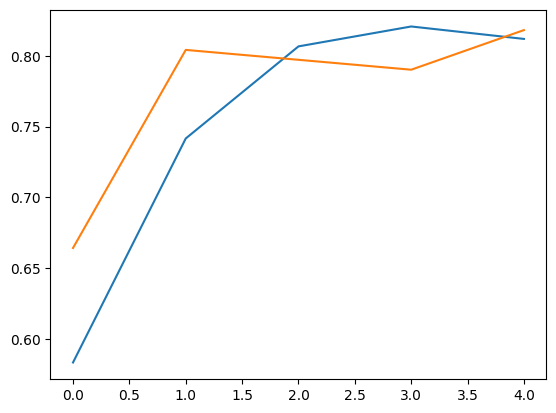

In [67]:
import matplotlib.pyplot as plt
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])  
plt.show()

In [68]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss', score[0])
print('accuracy', score[1])

loss 0.13621626794338226
accuracy 0.8212290406227112
